In [1]:
# Test fe18 stuff with the different degradation factors
# 14-Sep-2020 IGH

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import astropy.time as atime
from astropy.coordinates import SkyCoord
from astropy import units as u

import sunpy.map

from aiapy.calibrate import degradation
from aiapy.calibrate.util import get_correction_table
from aiapy.calibrate import register, update_pointing

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's get the degradation correction factors for v8 and v9
channels = [94, 171, 211] * u.angstrom
time=atime.Time('2018-09-09T09:15:00', scale='utc')
print(channels)
print(time.isot)

[ 94. 171. 211.] Angstrom
2018-09-09T09:15:00.000


In [4]:
# Need to manually pull out the v8 and v9 version
nc=len(channels)
degs8=np.empty(nc)
degs9=np.empty(nc)
degs10=np.empty(nc)
# Bit slow but cant see how to do this via the calibration tables
for i in np.arange(nc):
    degs8[i]=degradation(channels[i],time,calibration_version=8)
    degs9[i]=degradation(channels[i],time,calibration_version=9)
    degs10[i]=degradation(channels[i],time,calibration_version=10)
print(degs8,degs9,degs10)

[0.74183735 0.75479493 0.69658929] [0.93609983 0.73458129 0.5770613 ] [0.94698421 0.73993289 0.58687906]


In [5]:
# Just have the numbers here manually as faster the next time and can above above cell
degs8=np.array([0.74183735, 0.75479493, 0.69658929])
degs9=np.array([0.93609983,0.73458129,0.5770613 ])

print(degs8,degs9)

[0.74183735 0.75479493 0.69658929] [0.93609983 0.73458129 0.5770613 ]


In [6]:
# Now load in the fits files
fdir='/Users/iain/Downloads/' 
f094=fdir+'aia.lev1.94A_2018-09-09T09_14_47.13Z.image_lev1.fits'
f171=fdir+'aia.lev1.171A_2018-09-09T09_14_57.34Z.image_lev1.fits'
f211=fdir+'aia.lev1.211A_2018-09-09T09_14_57.62Z.image_lev1.fits'

In [7]:
# m094 = sunpy.map.Map(f094)
# m094_updated_pointing = update_pointing(m094)
# m094_reg = register(m094_updated_pointing)
# bottom_left = SkyCoord(270 * u.arcsec, 20 * u.arcsec, frame=m094_reg.coordinate_frame)
# top_right = SkyCoord(390 * u.arcsec, 140 * u.arcsec, frame=m094_reg.coordinate_frame)
# m094_smap = m094_reg.submap(bottom_left, top_right=top_right)
# m094_smap.save(fdir+'a094_20180909_submap.fits',overwrite='True')

# m171 = sunpy.map.Map(f171)
# m171_updated_pointing = update_pointing(m171)
# m171_reg = register(m171_updated_pointing)
# bottom_left = SkyCoord(270 * u.arcsec, 20 * u.arcsec, frame=m171_reg.coordinate_frame)
# top_right = SkyCoord(390 * u.arcsec, 140 * u.arcsec, frame=m171_reg.coordinate_frame)
# m171_smap = m171_reg.submap(bottom_left, top_right=top_right)
# m171_smap.save(fdir+'a171_20180909_submap.fits',overwrite='True')

# m211 = sunpy.map.Map(f211)
# m211_updated_pointing = update_pointing(m211)
# m211_reg = register(m211_updated_pointing)
# bottom_left = SkyCoord(270 * u.arcsec, 20 * u.arcsec, frame=m211_reg.coordinate_frame)
# top_right = SkyCoord(390 * u.arcsec, 140 * u.arcsec, frame=m211_reg.coordinate_frame)
# m211_smap = m211_reg.submap(bottom_left, top_right=top_right)
# m211_smap.save(fdir+'a211_20180909_submap.fits',overwrite='True')


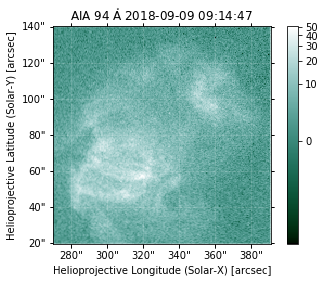

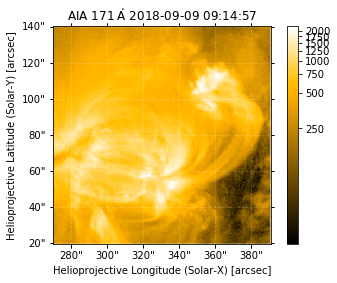

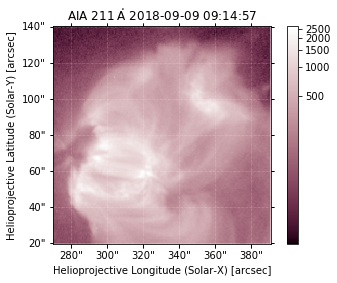

In [8]:
# Load back in the submaps and check look ok
mp094=sunpy.map.Map(fdir+'a094_20180909_submap.fits')
mp171=sunpy.map.Map(fdir+'a171_20180909_submap.fits')
mp211=sunpy.map.Map(fdir+'a211_20180909_submap.fits')

mp094.peek()
mp171.peek()
mp211.peek()


In [9]:
# Extract the data from the maps
data094=mp094.data/mp094.exposure_time.value
data171=mp171.data/mp171.exposure_time.value
data211=mp211.data/mp211.exposure_time.value
data094[data094 <0] = 0
data171[data171 <0] = 0
data211[data211 <0] = 0

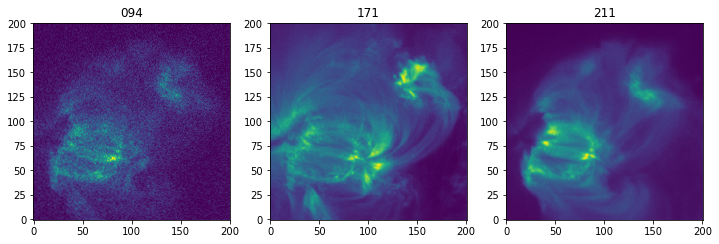

In [10]:
fig, ax = plt.subplots(1, 3,figsize=(12, 4))
ax[0].imshow(data094,origin='lower')
ax[0].set_title('094')
ax[1].imshow(data171,origin='lower')
ax[1].set_title('171')
ax[2].imshow(data211,origin='lower')
ax[2].set_title('211')
plt.show()

In [11]:
# Make the degradation corrections
data094v8=data094/degs8[0]
data171v8=data171/degs8[1]
data211v8=data211/degs8[2]

data094v9=data094/degs9[0]
data171v9=data171/degs9[1]
data211v9=data211/degs9[2]

In [12]:
# Work out the Fe18
datafe18v8=data094v8 - data171v8/450. - data211v8/211.
datafe18v8[datafe18v8 < 0]=0
datafe18v9=data094v9 - data171v9/450. - data211v9/211.
datafe18v9[datafe18v9 < 0]=0

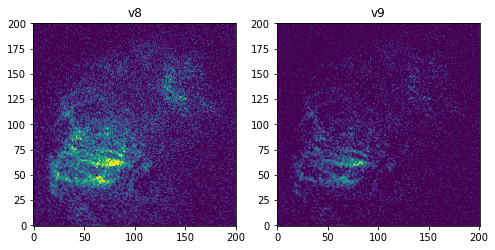

In [13]:
fig, ax = plt.subplots(1, 2,figsize=(8, 4))
ax[0].imshow(datafe18v8,origin='lower',norm=colors.Normalize(vmin=0.01,vmax=10))
ax[0].set_title('v8')
ax[1].imshow(datafe18v9,origin='lower',norm=colors.Normalize(vmin=0.01,vmax=10))
ax[1].set_title('v9')
plt.show()

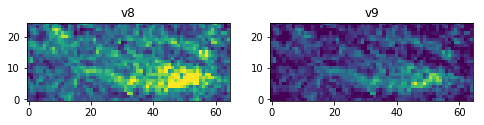

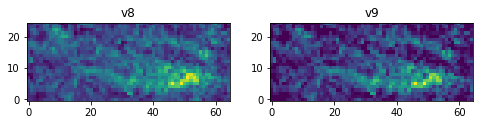

In [14]:
loopv8=datafe18v8[55:80,30:95]
loopv9=datafe18v9[55:80,30:95]
fig, ax = plt.subplots(1, 2,figsize=(8, 4))
ax[0].imshow(loopv8,origin='lower',norm=colors.Normalize(vmin=0.01,vmax=10))
ax[0].set_title('v8')
ax[1].imshow(loopv9,origin='lower',norm=colors.Normalize(vmin=0.01,vmax=10))
ax[1].set_title('v9')
plt.show()


fig, ax = plt.subplots(1, 2,figsize=(8, 4))
ax[0].imshow(loopv8,origin='lower',\
             norm=colors.Normalize(vmin=np.min(loopv8[loopv8>0]),vmax=np.max(loopv8)))
ax[0].set_title('v8')
ax[1].imshow(loopv9,origin='lower',\
             norm=colors.Normalize(vmin=np.min(loopv9[loopv9>0]),vmax=np.max(loopv9)))
ax[1].set_title('v9')
plt.show()

In [19]:
print('<v8 DN/s/px>: ',np.mean(loopv8))
print('<v9 DN/s/px>: ',np.mean(loopv9))
print('Ratio: ',np.mean(loopv8)/np.mean(loopv9))

print('<v8 pos DN/s/px>: ',np.mean(loopv8[loopv8 >0]))
print('<v9 pos DN/s/px>: ',np.mean(loopv9[loopv9 >0]))
print('Ratio pos: ',np.mean(loopv8[loopv8 >0])/np.mean(loopv9[loopv9 >0]))

<v8 DN/s/px>:  4.337751132916724
<v9 DN/s/px>:  1.9547776547220261
Ratio:  2.2190509096716484
<v8 pos DN/s/px>:  4.3511392536973315
<v9 pos DN/s/px>:  2.187681603941661
Ratio pos:  1.9889271116316263
